In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# This module process the data.
df = pd.read_excel("./data.xlsx", usecols=[0, 1])

In [3]:
df.columns = ["Time", "Flow"]
print(df.head())
print("Length: {}".format(len(df)))

                     Time   Flow
0 2018-04-10 13:51:39.758  0.000
1 2018-04-10 13:51:47.280  0.004
2 2018-04-10 13:51:54.703  0.000
3 2018-04-10 13:58:12.982  0.000
4 2018-04-10 13:58:20.366  0.004
Length: 218654


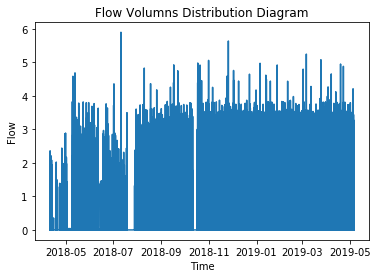

In [4]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot(df["Time"], df["Flow"])
plt.title("Flow Volumns Distribution Diagram")
plt.xlabel("Time")
plt.ylabel("Flow")
plt.savefig("Flow1.png")
plt.show()



c:\users\alva\appdata\local\programs\python\python37\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


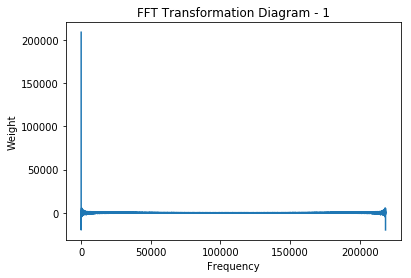

(-19803.065765724852+20161.865817633676j)
(-5146.988987202996+9830.779163859892j)
(-4686.2683059484825+10736.644105758176j)
(-4608.953618748526+7759.868400664827j)


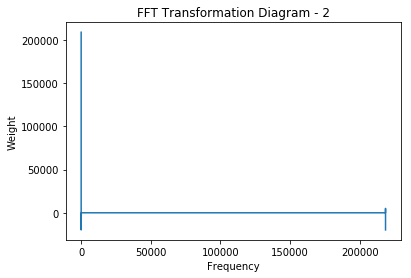

[0.6737992 +0.00000000e+00j 0.67373416+1.66380620e-17j
 0.67366912-8.31903100e-18j ... 0.67399431-1.82832018e-17j
 0.67392928-1.02377929e-16j 0.67386424-5.88191498e-17j]


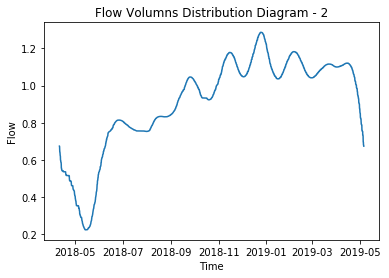

218654
0.48349342521214944


In [8]:
from scipy.fftpack import fft,ifft
from sklearn.metrics import mean_squared_error

result = fft(df["Flow"])

plt.plot(result)
plt.title("FFT Transformation Diagram - 1")
plt.xlabel("Frequency")
plt.ylabel("Weight")
plt.savefig("FFT0.png")
plt.show()

print(result[1])
print(result[2])
print(result[3])
print(result[4])

for i in range(len(result)):
    if (abs(result[i]) <= 7000):
        result[i] = 0
        
plt.plot(result)
plt.title("FFT Transformation Diagram - 2")
plt.xlabel("Frequency")
plt.ylabel("Weight")
plt.savefig("FFT.png")
plt.show()

test = ifft(result)
print(test)
plt.plot(df["Time"], test)
plt.title("Flow Volumns Distribution Diagram - 2")
plt.xlabel("Time")
plt.ylabel("Flow")
plt.savefig("Flow2.png")
plt.show()

print(len(df["Flow"]))
print(mean_squared_error(df["Flow"].values, abs(test)))

In [6]:
print(result)
print(fft(df["Flow"]))

[208701.799         +0.j         -19803.06576572+20161.86581763j
  -5146.9889872  +9830.77916386j ...  -4686.26830595-10736.64410576j
  -5146.9889872  -9830.77916386j -19803.06576572-20161.86581763j]
[208701.799         +0.j         -19803.06576572+20161.86581763j
  -5146.9889872  +9830.77916386j ...  -4686.26830595-10736.64410576j
  -5146.9889872  -9830.77916386j -19803.06576572-20161.86581763j]
